## PRAICP-1012-Pneumonia chest x-ray classification

In [7]:
# -------------------- File Handling & OS Interaction --------------------
import os
import pathlib

# -------------------- Data Handling & Visualization --------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image

plt.style.use("fivethirtyeight")
%matplotlib inline  

# -------------------- Deep Learning (TensorFlow & Keras) --------------------
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from keras.layers import Rescaling

# -------------------- Model Visualization --------------------
import visualkeras

# -------------------- Model Optimization (Callbacks) --------------------
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# -------------------- Suppress Unnecessary Warnings --------------------
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Specify the path to the dataset

data_dir_train = pathlib.Path('D:/Datamites Capstone Projects\AIE Project/Chest Xray code/chest_xray/train')
data_dir_test = pathlib.Path('D:/Datamites Capstone Projects/AIE Project/Chest Xray code/chest_xray/test')
data_dir_val = pathlib.Path('D:/Datamites Capstone Projects/AIE Project/Chest Xray code/chest_xray/val')

In [9]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 5216
Number of Images in Test: 624
Number of Images in Validation: 16


In [10]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 256
width = 256
batch_size = 16
seed = 42 # For reproducibility 

In [11]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.3 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.3,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 3652 files for training.


In [12]:
# Second we ask Keras to create a "validation" dataset with 0.3 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.3,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 1564 files for validation.


In [13]:
# Finally we are storing all the available class names from the dataset. (NORMAL and PNEUMONIA)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

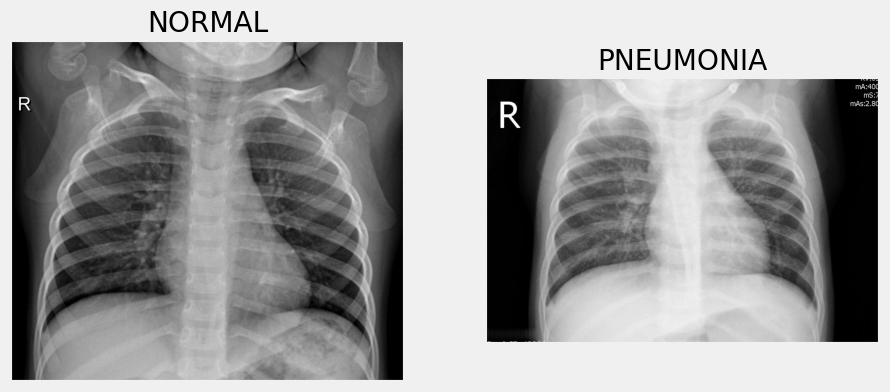

In [14]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

In [15]:
# Here we start building our model in Keras:

model = Sequential([
    Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation='sigmoid'),
])

In [16]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

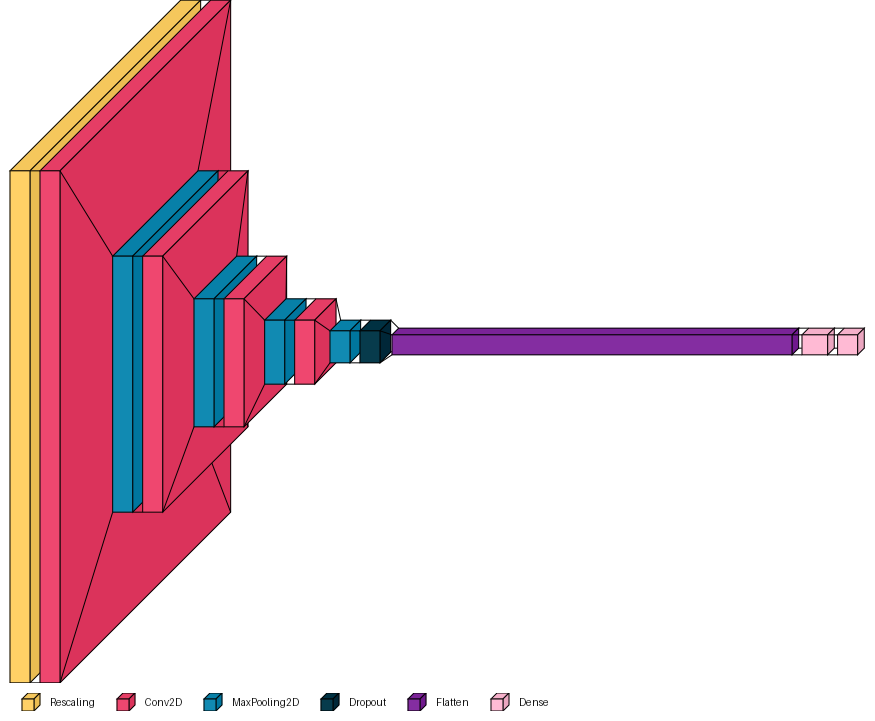

In [17]:
# Visualizing our model (Hidden Input)
visualkeras.layered_view(model, scale_xy=2, legend=True)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,486,561 (32.37 MB)

 Trainable params: 8,486,561 (32.37 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Define a callback to save the best model in .keras format
checkpoint_callback = ModelCheckpoint(
    filepath='my_model.keras',  # Save model in .keras format
    monitor='val_loss',          # Monitor validation loss
    save_best_only=True,         # Save only the best model
    mode='min',                  # Save when val_loss is minimized
    verbose=1
)

In [20]:
# Define a callback to stop training if validation loss does not improve for 5 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=5,              # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore model weights from the best epoch
)

In [21]:
# Finally we are going to train our model for 10 epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_callback, early_stopping],  # Include early stopping here
)

Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.8272 - loss: 0.3687
Epoch 1: val_loss improved from inf to 0.13744, saving model to my_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.8275 - loss: 0.3681 - val_accuracy: 0.9533 - val_loss: 0.1374
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9458 - loss: 0.1432
Epoch 2: val_loss improved from 0.13744 to 0.09775, saving model to my_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 55s 241ms/step - accuracy: 0.9459 - loss: 0.1430 - val_accuracy: 0.9706 - val_loss: 0.0978
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9609 - loss: 0.0941
Epoch 3: val_loss improved from 0.09775 to 0.09243, saving model to my_model.keras
229/229 ━━━━━━━━━━━━━━━━━━━━ 56s 246ms/step - accuracy: 0.9609 - loss: 0.0941 - val_accuracy: 0.9731 - val_loss: 0.0924
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9803 - loss: 0.0591
Epoch 4: val_loss did not improve from 0.09

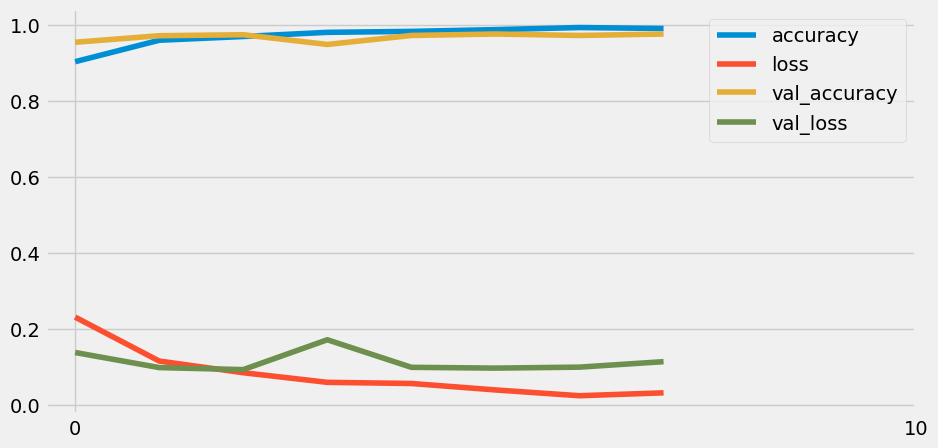

In [22]:
# Next we are going to plot a graph to check the loss and accuracy as the model trained for 10 epochs for both train and validation.
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

In [25]:
# Extract training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the final training and validation loss and accuracy
print(f"Training Loss: {train_loss[-1]:.4f}")
print(f"Validation Loss: {val_loss[-1]:.4f}")
print(f"Training Accuracy: {train_acc[-1] * 100:.2f}%")
print(f"Validation Accuracy: {val_acc[-1] * 100:.2f}%")


Training Loss: 0.0313
Validation Loss: 0.1134
Training Accuracy: 98.96%
Validation Accuracy: 97.51%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


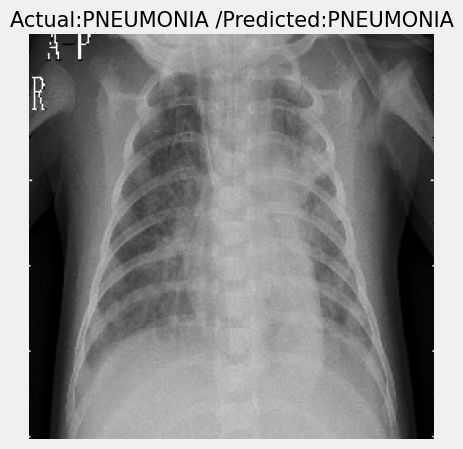

In [ ]:
# Loading the best model that we had saved :
my_xray_cnnmodel = keras.models.load_model("./best_model.keras")

# Defining an image path from the "val" folder:
image_path = 'D:/Datamites Capstone Projects/AIE Project/Chest Xray code/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'

# Preprocessing the image to 256x256x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = 'PNEUMONIA' if predictions[0][0] > 0.5 else 'NORMAL'

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


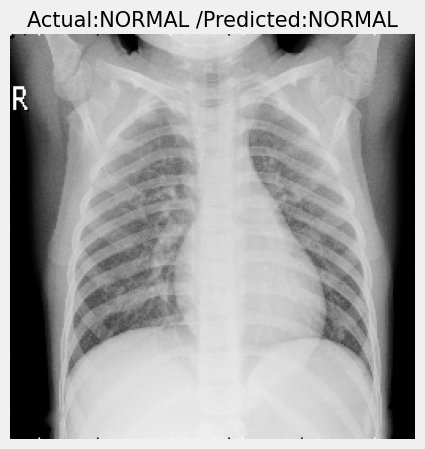

In [ ]:
# Loading the best model that we had saved in the previous step:
my_xray_cnnmodel = keras.models.load_model("./best_model.keras")

# Defining an image path from the "val" folder:
image_path = 'D:/Datamites Capstone Projects/AIE Project/Chest Xray code/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'

# Preprocessing the image to 256x256x3 size and predicting the label:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = 'PNEUMONIA' if predictions[0][0] > 0.5 else 'NORMAL'

# Finally we are displaying the predicted outcome:
plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()